<a href="https://colab.research.google.com/github/lizathulya/Data_Analytics_/blob/main/Global_Youtube_Stats_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd#importing all necessary libraries
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv(r'/content/Global YouTube Statistics.csv')

In [58]:
# Print sample
df.sample(6).reset_index(drop=True).style.set_properties(**{'background-color': 'green','color': 'black','border-color': 'blue'})

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,Abbreviation,channel_type,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,lowest_yearly_earnings,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,241,TRANS7 OFFICIAL,25000000,14169516119.000000,Entertainment,TRANS7 OFFICIAL,89179,Indonesia,ID,Entertainment,251.000000,7.000000,64.000000,123189000.000000,30800.000000,492800.000000,369600.000000,5900000.000000,100000.000000,2014.000000,Sep,4.000000,36.300000,270203917.000000,4.690000,151509724.000000,-0.789275,113.921327
1,928,Adam W,12800000,9502983550.000000,Comedy,Adam W,681,United States,US,Comedy,492.000000,171.000000,39.000000,228951000.000000,57200.000000,915800.000000,686900.000000,11000000.000000,200000.000000,2015.000000,Oct,4.000000,88.200000,328239523.000000,14.700000,270663028.000000,37.090240,-95.712891
2,472,Jake Fellman,18100000,13378360425.000000,Entertainment,Jake Fellman,420,United States,US,Entertainment,274.000000,122.000000,118.000000,497044000.000000,124300.000000,2000000.000000,1500000.000000,23900000.000000,700000.000000,2012.000000,Oct,13.000000,88.200000,328239523.000000,14.700000,270663028.000000,37.090240,-95.712891
3,598,FitDance,16100000,7126210721.000000,Music,Fitdance Academy,41,France,FR,Entertainment,4006012.000000,3726.000000,6335.000000,780.000000,0.200000,3.000000,2.000000,37.000000,4.000000,2006.000000,Nov,20.000000,65.600000,67059887.000000,8.430000,54123364.000000,46.227638,2.213749
4,784,#Refugio Mental,14100000,3594936775.000000,Entertainment,#Refugio Mental,846,nan,nan,Entertainment,2218.000000,nan,155.000000,6942000.000000,1700.000000,27800.000000,20800.000000,333200.000000,nan,2013.000000,Aug,10.000000,nan,nan,nan,nan,nan,nan
5,321,Sagawa /���,22000000,18347969186.000000,Entertainment,Sagawa /���,6274,Japan,JP,Entertainment,144.000000,3.000000,88.000000,711254000.000000,177800.000000,2800000.000000,2100000.000000,34100000.000000,800000.000000,2021.000000,Feb,13.000000,63.200000,126226568.000000,2.290000,115782416.000000,36.204824,138.252924


In [ ]:
# cleaning data and filling null columns
df_cleaned = df.replace('nan', pd.NA)  # Replace 'nan' with pandas' NA for numeric columns
numeric_columns = ['rank', 'subscribers', 'video views', 'video_views_for_the_last_30_days',
                   'lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings',
                   'highest_yearly_earnings', 'subscribers_for_last_30_days', 'created_year', 'Unemployment rate']
for col in numeric_columns:
    df_cleaned[col] = pd.to_numeric(df_cleaned[col], errors='coerce')

df_cleaned = df_cleaned.dropna()

top_10_subscribers = df_cleaned.nlargest(10, 'subscribers')

In [ ]:
pic = px.bar(top_10_subscribers, x='subscribers', y='Youtuber', orientation='h', text='subscribers',#Plotting the top 10 chnnels with subscribers
              color='subscribers', labels={'subscribers': 'Subscribers (in billions)'},
              color_continuous_scale='Viridis')
pic.update_traces(marker_line_color='rgb(8,48,107)', marker_line_width=1.5,
                    opacity=0.8, textposition='inside')
pic.update_layout(title_text='Top 10 YouTube Channels by Subscribers', yaxis_title='YouTube Channel',
                   xaxis_title='Subscribers (in billions)', height=500)
pic.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
df.describe()

,rank,subscribers,video views,uploads,video_views_rank,country_rank,channel_type_rank,video_views_for_the_last_30_days,lowest_monthly_earnings,highest_monthly_earnings,...,highest_yearly_earnings,subscribers_for_last_30_days,created_year,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
count,995.00000,9.950000e+02,9.950000e+02,995.000000,9.940000e+02,879.000000,962.000000,9.390000e+02,995.000000,9.950000e+02,...,9.950000e+02,6.580000e+02,990.000000,990.000000,872.000000,8.720000e+02,872.000000,8.720000e+02,872.000000,872.000000
mean,498.00000,2.298332e+07,1.103954e+10,9187.125628,5.542489e+05,386.053470,745.719335,1.756103e+08,36886.148281,5.898078e+05,...,7.081814e+06,3.490791e+05,2012.630303,15.746465,63.627752,4.303873e+08,9.279278,2.242150e+08,26.632783,-14.128146
std,287.37606,1.753005e+07,1.411084e+10,34151.352254,1.362782e+06,1232.244746,1944.386561,4.163782e+08,71858.724092,1.148622e+06,...,1.379704e+07,6.143554e+05,4.512503,8.777520,26.106893,4.727947e+08,4.888354,1.546874e+08,20.560533,84.760809
min,1.00000,1.230000e+07,0.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,1.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,1.000000e+00,1970.000000,1.000000,7.600000,2.025060e+05,0.750000,3.558800e+04,-38.416097,-172.104629
25%,249.50000,1.450000e+07,4.288145e+09,194.500000,3.230000e+02,11.000000,27.000000,2.013750e+07,2700.000000,4.350000e+04,...,5.217500e+05,1.000000e+05,2009.000000,8.000000,36.300000,8.335541e+07,5.270000,5.590832e+07,20.593684,-95.712891
50%,498.00000,1.770000e+07,7.760820e+09,729.000000,9.155000e+02,51.000000,65.500000,6.408500e+07,13300.000000,2.127000e+05,...,2.600000e+06,2.000000e+05,2013.000000,16.000000,68.000000,3.282395e+08,9.365000,2.706630e+08,37.090240,-51.925280
75%,746.50000,2.460000e+07,1.355470e+10,2667.500000,3.584500e+03,123.000000,139.750000,1.688265e+08,37900.000000,6.068000e+05,...,7.300000e+06,4.000000e+05,2016.000000,23.000000,88.200000,3.282395e+08,14.700000,2.706630e+08,37.090240,78.962880
max,995.00000,2.450000e+08,2.280000e+11,301308.000000,4.057944e+06,7741.000000,7741.000000,6.589000e+09,850900.000000,1.360000e+07,...,1.634000e+08,8.000000e+06,2022.000000,31.000000,113.100000,1.397715e+09,14.720000,8.429340e+08,61.924110,138.252924


In [ ]:
#3d plot of Subscirbers ,video views and  Uploads of the channel
pic1 = go.Figure(data=go.Scatter3d(
    x=df_cleaned['subscribers'],
    y=df_cleaned['video views'],
    z=df_cleaned['uploads'],
    mode='markers',
    marker=dict(
        size=8,
        color=df_cleaned['video_views_for_the_last_30_days'],
        colorscale='Viridis',
        opacity=0.7
    )
))

pic1.update_layout(title='YouTube Channels: Subscribers, Video Views, and Uploads',
                   scene=dict(xaxis_title='Subscribers', yaxis_title='Video Views', zaxis_title='Uploads'),
                   margin=dict(l=0, r=0, b=0, t=30))
pic1.show()

In [ ]:
#  Scatter plot for subscribers vs. video views with size and color encoding
fig3 = px.scatter(df_cleaned, x='subscribers', y='video views', size='video_views_for_the_last_30_days',
                  color='category', hover_name='Youtuber', hover_data=['Country'], size_max=40,
                  labels={'subscribers': 'Subscribers (in billions)', 'video views': 'Video Views (in billions)'},
                  color_discrete_sequence=px.colors.qualitative.Set2)
fig3.update_layout(title_text='Subscribers vs. Video Views by Category', xaxis_type='log', yaxis_type='log')
fig3.show()

In [ ]:
!pip install plotly --upgrade#upgrading as bar() was giving error

In [ ]:
# bar chart for the distribution of channel types
pic2 = px.bar(df_cleaned, x='channel_type', color_discrete_sequence=px.colors.qualitative.Set3) # Changed px.barchart to px.bar as px.barchart requires a 'y' argument for bar charts
pic2.update_layout(title_text='Distribution of YouTube Channel Types', height=500)
pic2.show()

In [ ]:
earnings_columns = ['lowest_monthly_earnings', 'highest_monthly_earnings', 'lowest_yearly_earnings', 'highest_yearly_earnings']#box plot showing the relation between earnings
earnings_df = df_cleaned[earnings_columns]
pic4 = px.box(earnings_df, title='Distribution of Earnings',
              labels={'variable': 'Earnings', 'value': 'Earnings (in USD)'})
pic4.update_layout(height=500)
pic4.show()

In [ ]:
 pic5= px.bar(df_cleaned, x='category', y='lowest_monthly_earnings',
             title='Correlation between Category and Lowest Monthly Earnings',
             labels={'lowest_monthly_earnings': 'Lowest Monthly Earnings (USD)', 'category': 'Category'})
pic5.show()

In [50]:
pic6 = px.scatter(df_cleaned, x='video views', y='subscribers')
pic6.show()

In [54]:
# prompt: scatter plot betwween subscribers and Population

pic7 = px.scatter(df_cleaned, x='subscribers', y='Population')
pic7.show()

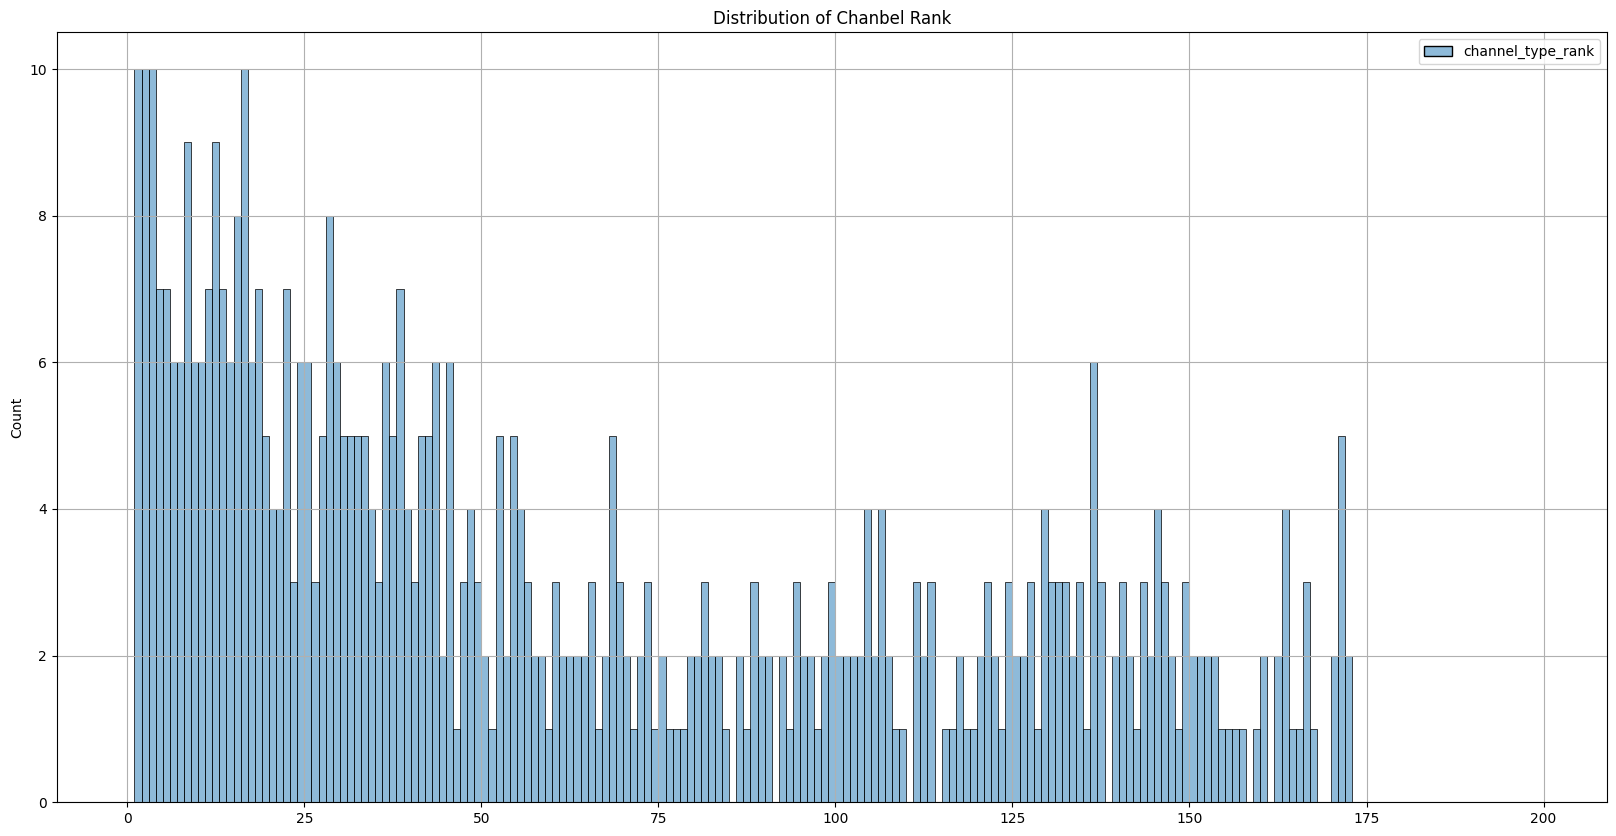

In [49]:
# Create a figure for plotting with specified size
plt.figure(figsize=(20, 10))
# Plot a histogram of the 'channel_type_rank' column with specified bins
sns.histplot([df_cleaned['channel_type_rank']], bins=[i for i in range(0, 200, 1)], kde=False)
# Add a title to the plot
plt.title("Distribution of Chanbel Rank")
# Enable grid on the plot for better readability
plt.grid()
# Display the plot
plt.show()

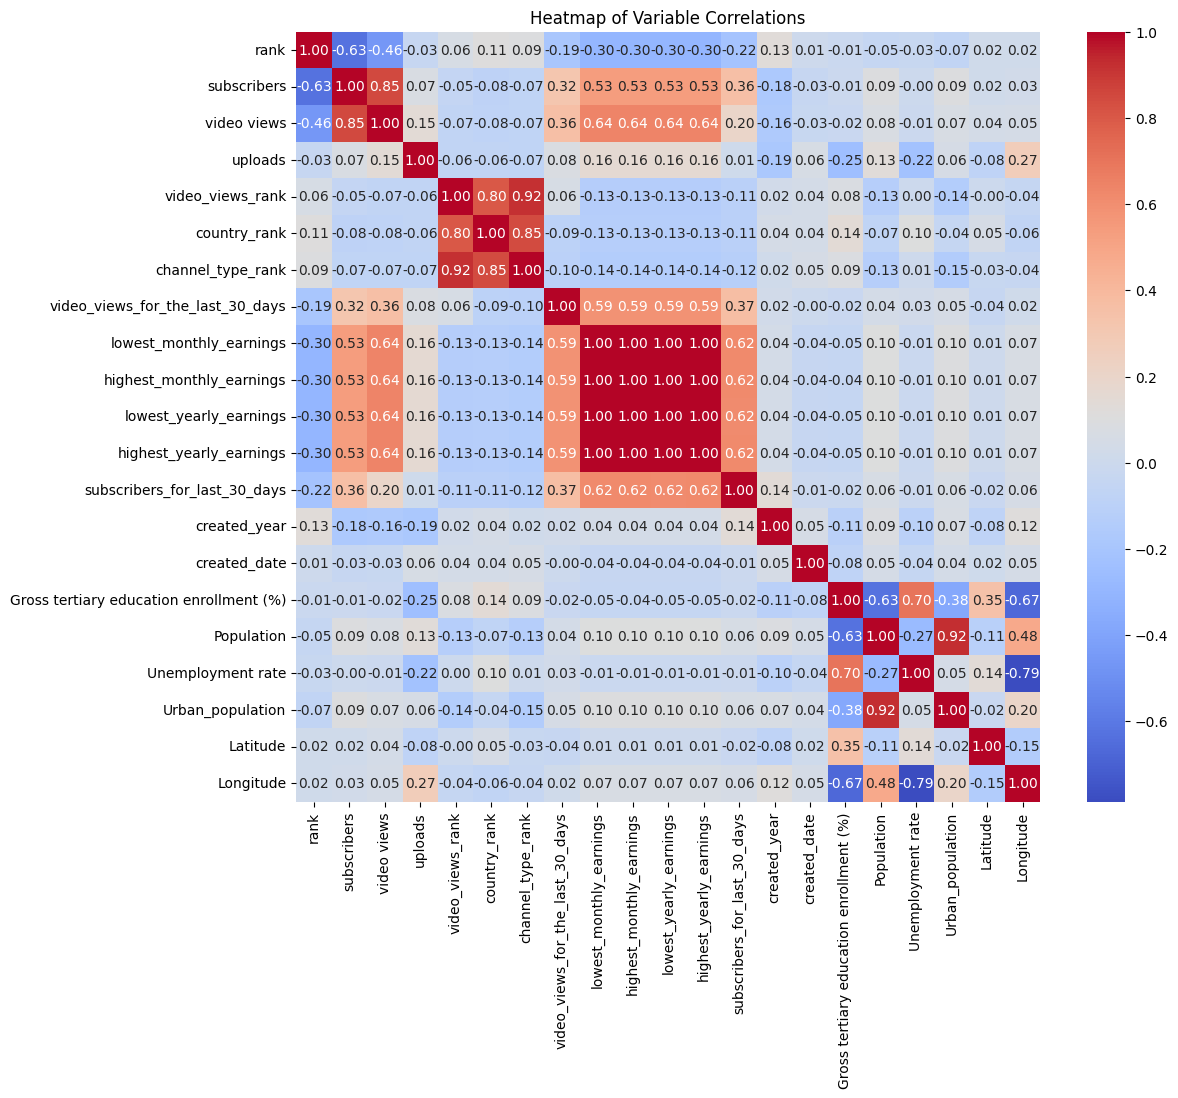

In [48]:
numeric_df = df_cleaned.select_dtypes(include=['number'])
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Variable Correlations')
plt.show()